In [46]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import pandas as pd 
import numpy as np
import netCDF4
import glob
from dateutil.parser import parse


        network                              platform  latitude  longitude  \
0          ADCP                ioos:station:wmo:42395   26.4040   -90.7920   
1       CenGOOS                ioos:station:wmo:42067   30.0430   -88.6490   
2        LUMCON               ioos:station:LUMCON:102   29.1870   -90.6093   
3        LUMCON             ioos:station:LUMCON:wisl1   29.1144   -90.1840   
4          NDBC          ioos:station:NOAA.NDBC:BURL1   28.9060   -89.4290   
...         ...                                   ...       ...        ...   
175038     NDBC                ioos:station:wmo:42057   17.0020   -81.5010   
175039    COMPS            ioos:station:USF.COMPS:FHP   28.1530   -82.8010   
175040    COMPS            ioos:station:USF.COMPS:SHP   30.0600   -84.2910   
175041      NOS  ioos:station:NOAA.NOS.CO-OPS:8728690   29.7267   -84.9817   
175042      NOS  ioos:station:NOAA.NOS.CO-OPS:8764227   29.4496   -91.3381   

                             date  air_temperature   
0       2

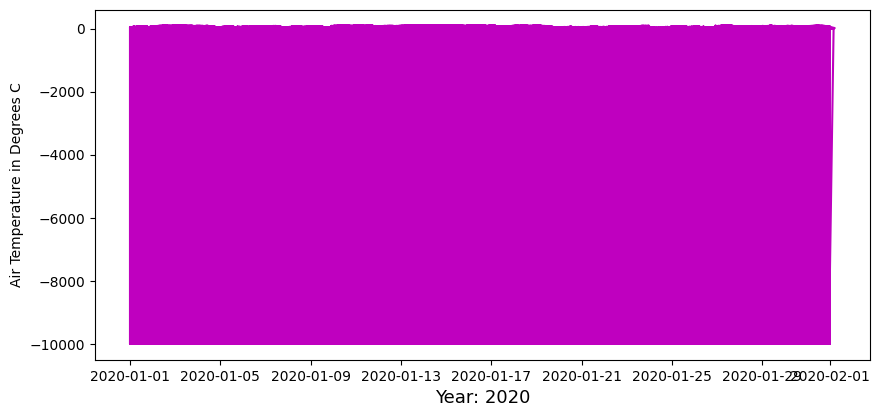

In [49]:
from dateutil.parser import parse
# take 1...let's try to find some riverine discharge data (if we're lucky)
filepath = "../Data/NASA MUREP/Plots for Hanna (GOM)/gcoos_2020_01_air_temperature.csv"
df = pd.read_csv(filepath, sep = ",")
#rawdata = df[["date","air_temperature"]]
data = df.copy()
data['air_temperature '] = data['air_temperature '].replace(r'^[A-Za-z].*', np.NaN, regex=True)
data.dropna(inplace=True)
#data=data.astype({'date':'DATETIME'})
#data=data.astype({'ait_temperature ':'float'})
#data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%dT%H:%M:%S")
data['date'] = data['date'].apply(lambda x: parse(x))
data['air_temperature '] = data['air_temperature '].astype(float)
print(data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(212)
ax.set_xlabel('Year: 2020', fontsize=13)
ax.set_ylabel('Air Temperature in Degrees C')

#xmin = np.min(x)
#xmax = np.max(x)
#ymin = np.min(y)
#ymax = np.max(y)

#num_ticks = 10
#x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

#print(xmin,xmax,ymin,ymax)
#ax.set_ylim(ymin, ymax)
#ax.set_xlim(xmin, xmax)

x = data['date']
y = data['air_temperature ']
print(x,y)
plt.plot(x, y,'m-')
#df
#nc = netCDF4.df(filepath)
#curr = df.variables['current']

In [ ]:
import xarray as xr
# take 2
filepath2 = "../Data/NASA MUREP/Plots for Hanna (GOM)/gcoos_2020_01_wind.csv"
df2 = pd.read_csv(filepath2)
df2

,network,platform,latitude,longitude,date,vertical_datum,wind_speed,wind_to_direction,wind_speed_of_gust
0,ADCP,ioos:station:wmo:42395,26.4040,-90.7920,2020-01-01T00:00:00Z,3.0,7.00,60.00,9.00
1,CenGOOS,ioos:station:wmo:42067,30.0430,-88.6490,2020-01-01T00:00:00Z,5.0,5.00,250.00,6.00
2,ENP,ioos.station.NOAA.NDBC:WRBF1,25.0720,-80.7350,2020-01-01T00:00:00Z,1.0,2.10,210.00,-9999.00
3,LUMCON,ioos:station:LUMCON:102,29.1870,-90.6093,2020-01-01T00:00:00Z,0.0,3.80,267.00,3.90
4,LUMCON,ioos:station:LUMCON:wisl1,29.1144,-90.1840,2020-01-01T00:00:00Z,1.0,1.00,191.00,13.30
...,...,...,...,...,...,...,...,...,...
124452,NDBC,ioos:station:wmo:42057,17.0020,-81.5010,2020-01-31T23:50:00Z,5.0,7.00,110.00,9.00
124453,COMPS,ioos:station:USF.COMPS:FHP,28.1530,-82.8010,2020-01-31T23:54:00,10.0,3.08,159.57,3.91
124454,COMPS,ioos:station:USF.COMPS:SHP,30.0600,-84.2910,2020-01-31T23:54:00,10.0,0.79,50.83,1.66
124455,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
